### EDA on Cars Dateset

In [114]:
# Stats and Trends Assignment
# Plots
# 1) Relational Plot (Blue)
# 2) Categorical Plot (Pink)
# 3) Stastical Plot (Skyblue)

# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("Laptop-Price.csv")                    # Load dataset

In [116]:
df.shape

(1146, 18)

In [117]:
df.describe()

,Inches,SSD,HDD,Flash Storage,Hybrid,Unnamed: 16,Price_euros
count,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,0.0,1146.000000
mean,15.151396,187.710297,46.347295,1.898778,0.539267,NaN,1204.876972
std,1.319303,160.313927,144.192738,26.275202,15.035060,NaN,676.630847
min,11.300000,0.000000,0.000000,0.000000,0.000000,NaN,265.000000
25%,14.000000,0.000000,0.000000,0.000000,0.000000,NaN,699.750000
50%,15.600000,256.000000,0.000000,0.000000,0.000000,NaN,1049.750000
75%,15.600000,256.000000,1.000000,0.000000,0.000000,NaN,1535.000000
max,18.400000,512.000000,500.000000,512.000000,508.000000,NaN,6099.000000


In [121]:
df.isnull().sum()                               # Check for null values

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
OpSys               0
Cpu Brand           0
Cpu Model           0
Cpu Rate            0
SSD                 0
HDD                 0
Flash Storage       0
Hybrid              0
Gpu Brand           0
Gpu Model           0
Price_euros         0
dtype: int64

In [119]:
df.drop("Unnamed: 16", axis = 1 , inplace = True)                              # Irregular Column

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


In [124]:
df.head(5)

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.9


### Performing EDA

In [319]:
# Scatter plot function to compare numerical columns

def relation_plot(col1, col2):
    plt.figure(dpi = 150)
    plt.scatter(df[col1], df[col2], edgecolor = "black")
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks()
    plt.yticks()
    plt.grid()

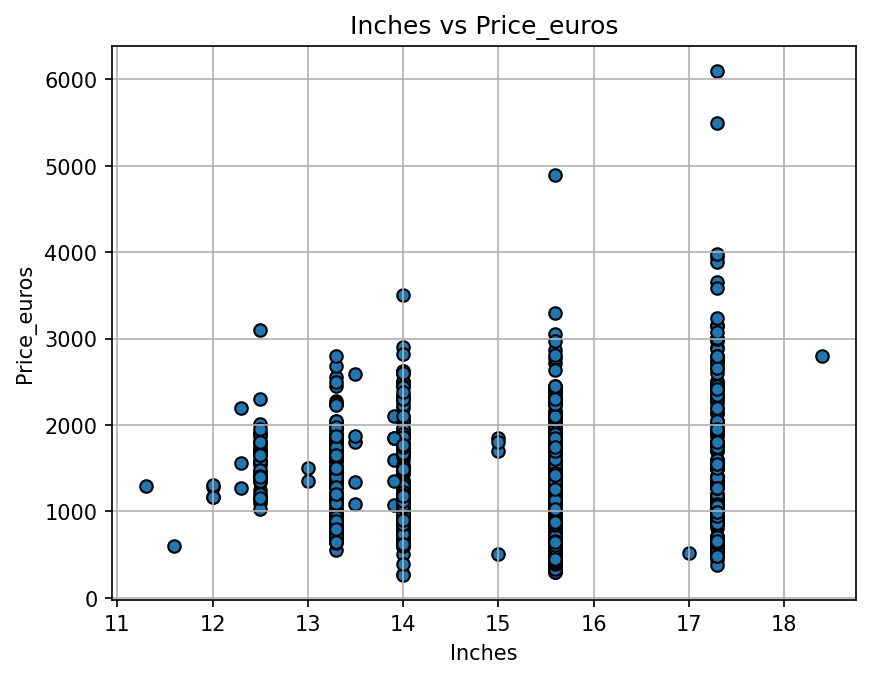

In [320]:
relation_plot('Inches','Price_euros')                                     # Comparing Price wiht Inches

In [308]:
df['Cpu Rate'] = df['Cpu Rate'].replace({'GHz' : ""}, regex = True).astype(float)      # changing Cpu rate to float

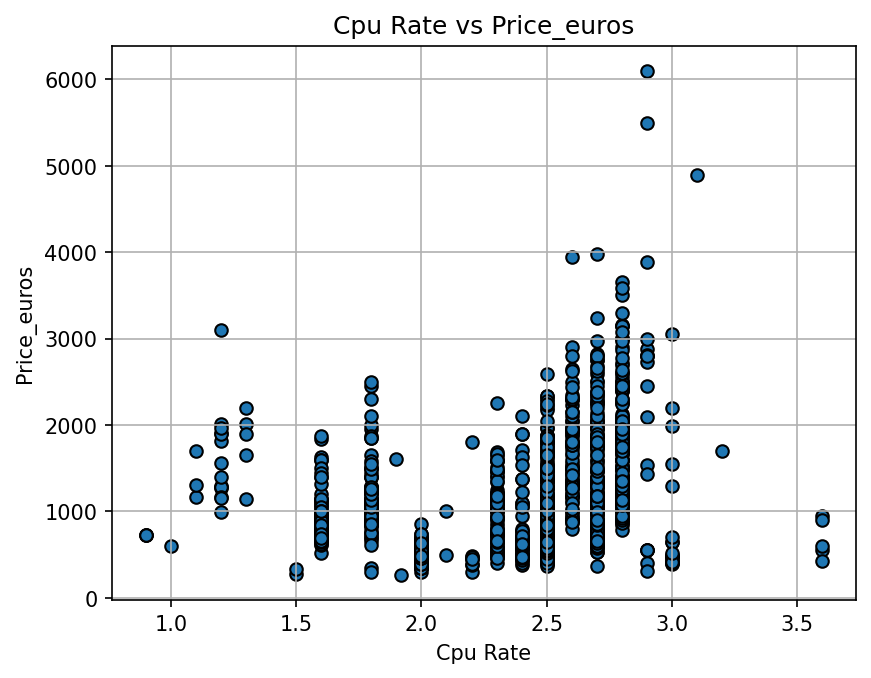

In [310]:
relation_plot('Cpu Rate','Price_euros')

In [302]:
# Barplot function to compare categorical columns to num

def categorical_plot(col1, col2):
    plt.figure(dpi = 150)
    plt.bar(df[col1],df[col2], color = "pink")         
    plt.xlabel(col1, size = 10)
    plt.ylabel(col2, size = 10)
    plt.title(f'{col1} vs {col2}')
    plt.xticks(rotation = 90)
    plt.yticks()
    plt.grid()

In [235]:
df['RAM_sort'] = df['Ram'].replace({"GB" : ""}, regex = True).astype(int)             # To compute Ram  -> changed to int

In [248]:
df.sort_values(by ="RAM_sort", inplace = True)                                        # Sort

In [278]:
df['RAM_sort'] = df['RAM_sort'].map(lambda x: f"{x}GB")                               # and change back to string

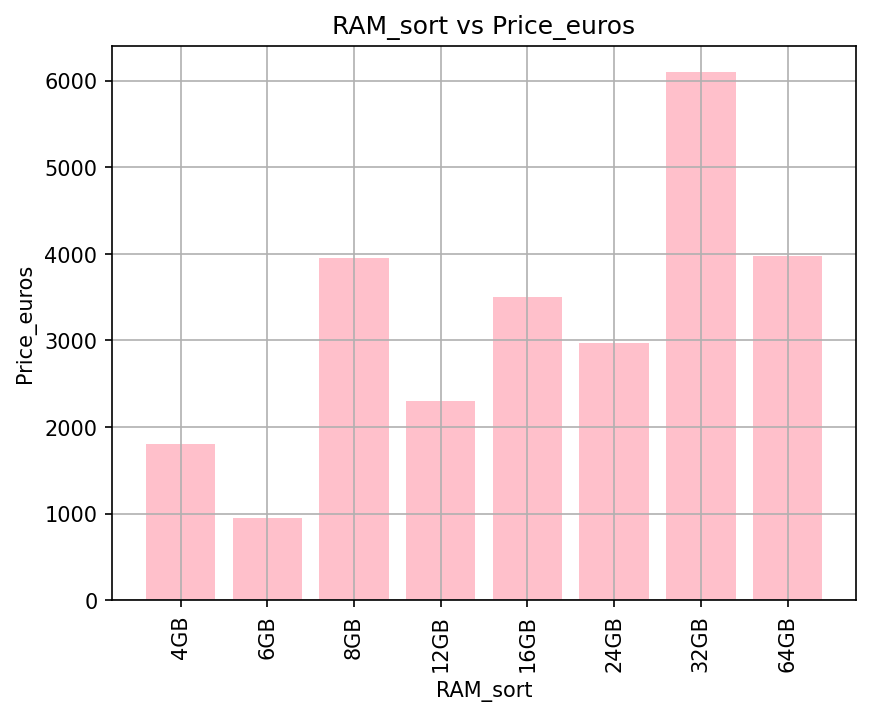

In [323]:
categorical_plot("RAM_sort", "Price_euros")                                           # Comparing Ram and price      

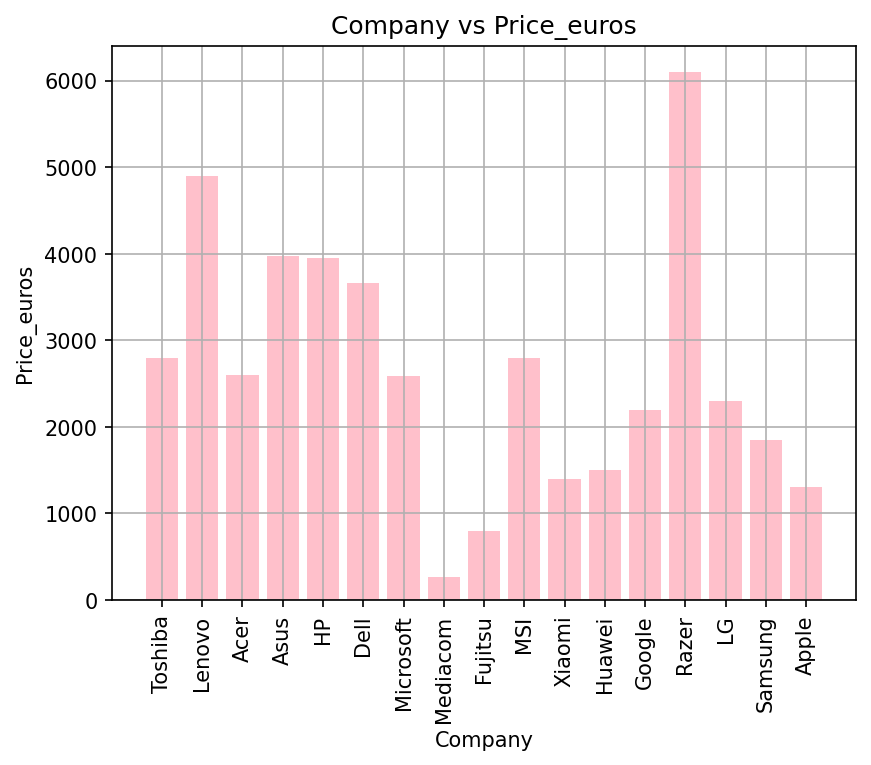

In [304]:
categorical_plot("Company", "Price_euros")                                             

In [313]:
# Statistical function

def statistical_plot(col1, t):
    plt.figure(figsize = (10,6))
    plt.hist(df[col1], bins = 10, color = 'skyblue', edgecolor = 'black')
    plt.xlabel(col1)
    plt.ylabel('Frequency')
    plt.grid()
    plt.title('Distribution of Laptop Prices')

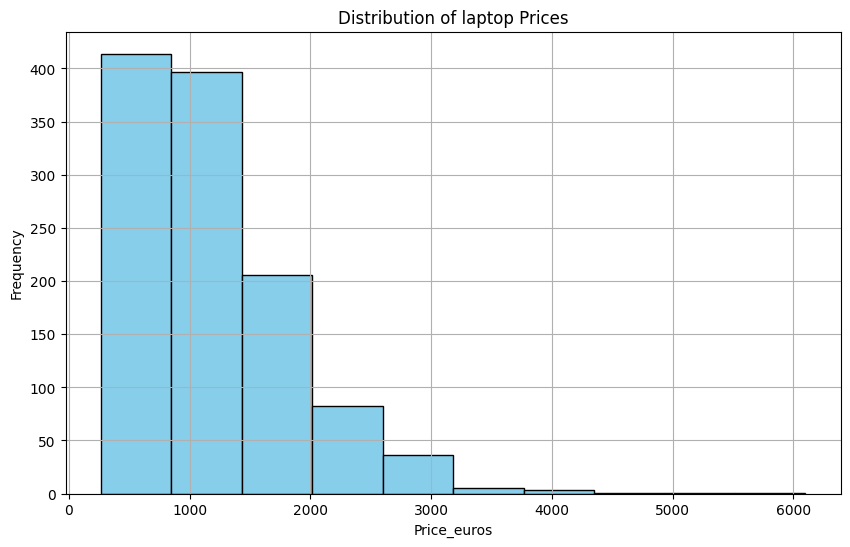

In [314]:
statistical_plot("Price_euros", "Distribution of laptop Prices")

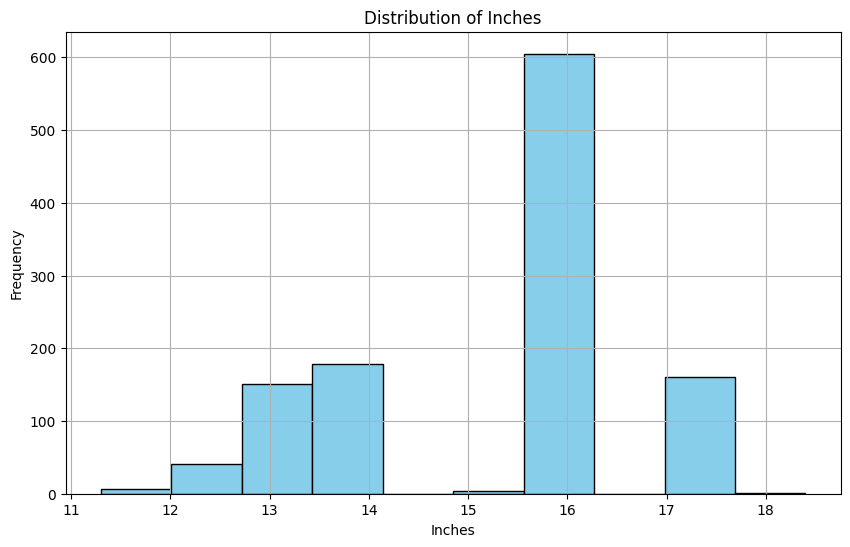

In [315]:
statistical_plot("Inches", "Distribution of Inches")

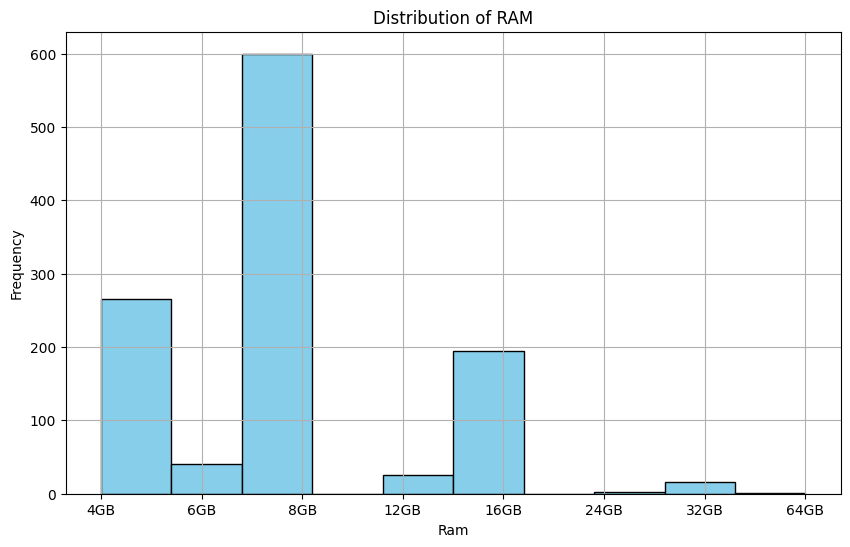

In [321]:
statistical_plot("Ram", "Distribution of RAM")